In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

Accuracy: 100.0


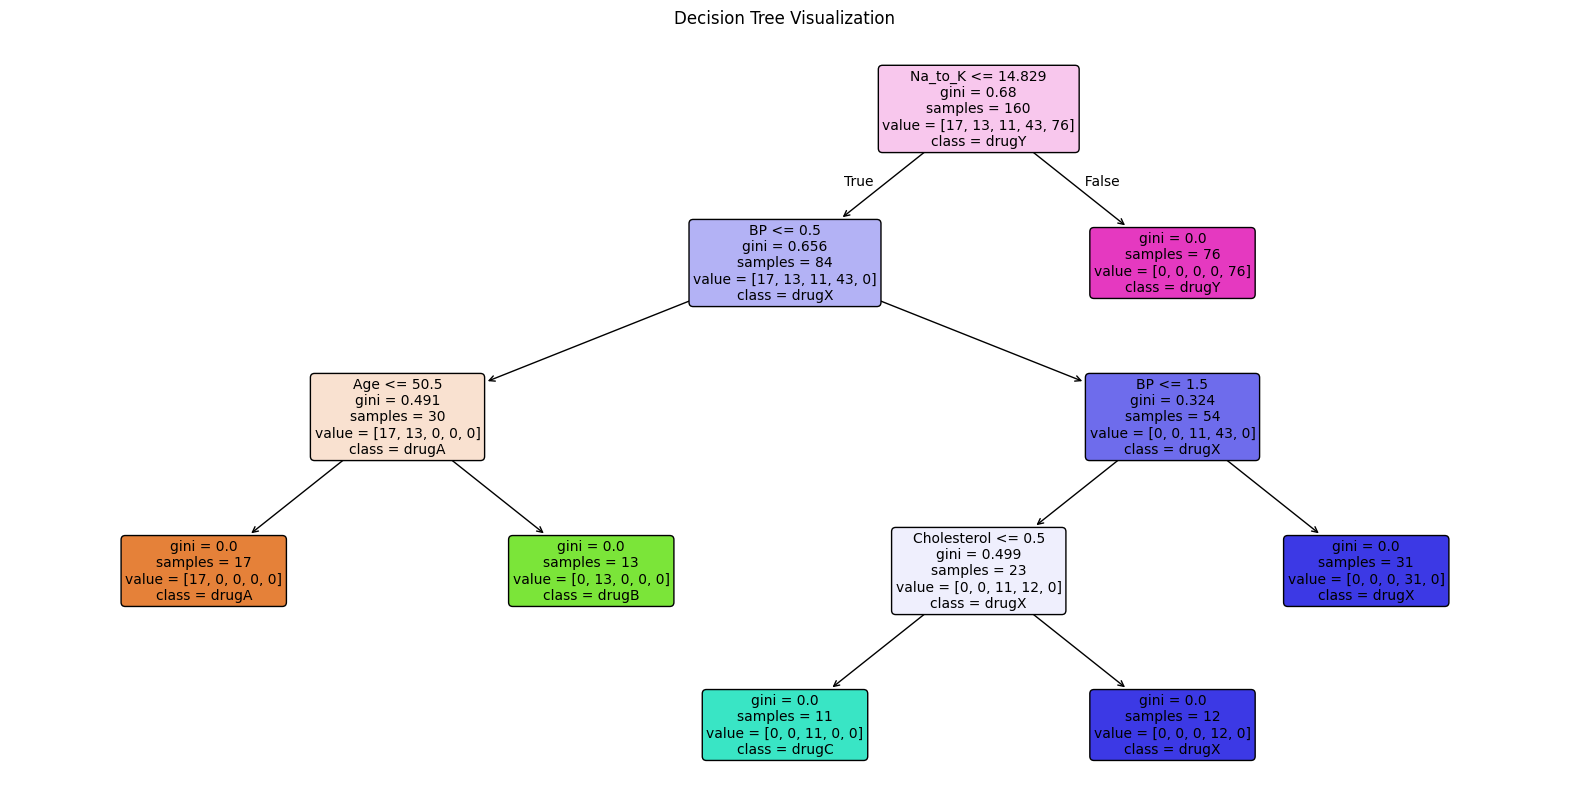

In [2]:
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('drug200.csv')
df=pd.DataFrame(data)
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])  
df['BP']=le.fit_transform(df['BP'])     
df['Cholesterol']=le.fit_transform(df['Cholesterol'])  
X=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y=df['Drug']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(max_depth=7,random_state=42)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test, y_test)
print(f"Accuracy: {accuracy*100}")
plt.figure(figsize=(20,10))
plot_tree(clf, 
          feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [3]:
print("Training set size:",len(X_train))
print("Testing set size:",len(X_test))
print("Overlap between train and test sets:",set(X_train.index)&set(X_test.index))

Training set size: 160
Testing set size: 40
Overlap between train and test sets: set()


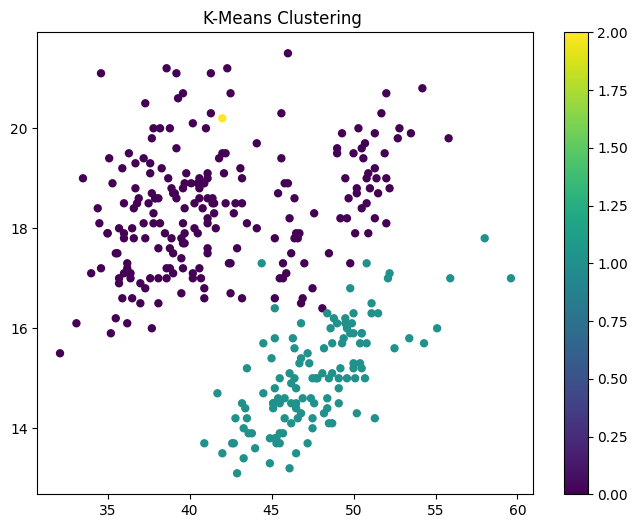

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('penguins.csv')
df=df.dropna()
X=df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)
kmeans=KMeans(n_clusters=3,random_state=42)  
df['Cluster']=kmeans.fit_predict(X_scale)
plt.figure(figsize=(8, 6))
plt.scatter(X['culmen_length_mm'], X['culmen_depth_mm'],c=df['Cluster'], s=25)
plt.title('K-Means Clustering ')
plt.colorbar()
plt.show()